**Import the necesssary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')#reading the dataset

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Cleaning the Data**

**Since the minimum value of features like Pregnancies, Glucose, etc. is zero it seems suscipious so I changed that with their respective median**

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
features = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose']
for i in features:
    zero=len(df[df[i]==0])
    print(i, ':', zero)

BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
Glucose : 5


In [6]:
features = ['BloodPressure', 'BMI', 'Insulin', 'SkinThickness', 'Glucose']
for i in features:
    median = np.median(df[df[i]!=0][i])
    df.loc[df[i]==0, i] = median

In [7]:
features = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose']
for i in features:
    zero=len(df[df[i]==0])
    print(i, ':', zero)

BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
Glucose : 0


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.shape

(768, 9)

# Logistics Regression

In [10]:
X = df.drop(columns='Outcome')

In [11]:
y = df['Outcome']

In [12]:
from sklearn.model_selection import train_test_split# splitting my dataset into train and test model
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=.30,random_state=42)

In [13]:
train_X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [14]:
train_X = train_X.values
m=len(train_X)
print('Number of training examples: {}'.format(m))
print('Shape of X: {}'.format(train_X.shape))
train_y = train_y.values.reshape(m,1)
print('Shape of y: {}'.format(train_y.shape))

Number of training examples: 537
Shape of X: (537, 8)
Shape of y: (537, 1)


In [15]:
train_X.shape

(537, 8)

**Normalizing my feature values with mean 0 and std 0, so that my algorithm can run better and fast**

In [16]:
def featureNormalize(train_X):
    mu=np.mean(train_X, axis=0)
    sigma = np.std(train_X, axis = 0)
    train_X = (train_X-mu)/sigma
    return train_X, mu, sigma

In [17]:
train_X, mu, sigma = featureNormalize(train_X)

**Adding the columns of ones for my Bias**

In [18]:
def addOnes(train_X):
    train_X = pd.DataFrame(train_X, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
    train_X['X0']=1
    columns = train_X.columns.tolist()
    columns = columns[-1:] + columns[:-1]
    train_X = train_X[columns]
    train_X = train_X.values
    return train_X

In [19]:
train_X = addOnes(train_X)

In [20]:
train_X.shape

(537, 9)

In [21]:
train_y.shape

(537, 1)

**Defining the sigmoid function**

In [22]:
def sigmoid(train_X, theta):
    XT = np.dot(train_X, theta)
    z = 1 / (1+np.exp(-XT))
    return z

**Cost Function**

In [23]:
def CostF(train_X, train_y, theta):
    m=len(train_X)
    h = sigmoid(train_X, theta)
    J = -1/m * (np.sum(train_y*np.log(h) + (1 - train_y)*np.log(1-h)))
    return J

**Gradient Descent**

In [24]:
def GradientD(train_X, train_y, theta, alpha, iters):
    m=len(train_X)
    J_history = np.zeros((iters,1))
    for i in range(iters):
        h = sigmoid(train_X, theta)
        errors = h - train_y
        delta = (alpha/m)*np.dot(train_X.T, errors)
        theta = theta - delta
        
        J_history[i] = CostF(train_X, train_y, theta)
    return theta, J_history

alpha = 0.03
iters = 500

In [25]:
theta = np.zeros((train_X.shape[1],1))


In [26]:
theta.shape

(9, 1)

In [27]:
train_X.shape

(537, 9)

In [28]:
theta, J_history = GradientD(train_X, train_y, theta, alpha, iters)

**Checking whether my cost function actually reduces with iterations or not**

Text(0, 0.5, 'Cost J')

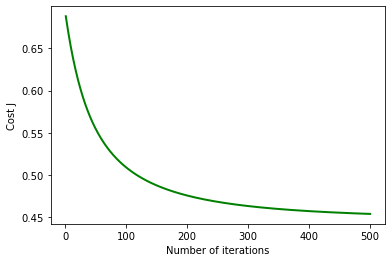

In [29]:
import matplotlib.pyplot as plt
x_iter = np.arange(1, iters+1)

fig, ax = plt.subplots()
ax.plot(x_iter, J_history, '-g', lw = 2)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')

**Predictions with the test set**

In [30]:
def featureNormalize(test_X):
    mu=np.mean(test_X, axis=0)
    sigma = np.std(test_X, axis = 0)
    test_X = (test_X-mu)/sigma
    return test_X, mu, sigma

In [31]:
test_X, mu, sigma = featureNormalize(test_X)

In [32]:
def addOnes(test_X):
    test_X = pd.DataFrame(test_X, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
    test_X['X0']=1
    columns = test_X.columns.tolist()
    columns = columns[-1:] + columns[:-1]
    test_X = test_X[columns]
    test_X = test_X.values
    return test_X

In [33]:
test_X = addOnes(test_X)

In [34]:
test_X.shape

(231, 9)

In [35]:
def predict(test_X):
    pred = sigmoid(test_X, theta)
    return pred

In [36]:
pred = predict(test_X)

In [37]:
pred.shape

(231, 1)

In [38]:
for i in range(0,231):
    if pred[i]<0.5:
        pred[i]=0
    else:
        pred[i]=1

In [39]:
test_y = test_y.values.reshape(len(test_X),1)

In [40]:
test_y.shape

(231, 1)

In [41]:
correct=0
incorrect=0
for i in range(0,231):
    if pred[i]==test_y[i]:
        correct=correct+1
    else:
        incorrect=incorrect+1

In [42]:
accuracy = correct / (incorrect + correct)

In [43]:
accuracy

0.7402597402597403